# iCDFの描画
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5838539/　より

In [1]:
def Accuracy(TP, TN, FP, FN):
    return np.array((TP + TN) / (TP + TN + FP + FN))
def MCC(TP, TN, FP, FN):
    """
    Calculates the Matthews Correlation Coefficient
    (TP*TN-FP*FN) / sqrt( (TP+FN)*(TN+FP)*(TP+FP)*(TN+FN) ) .
    >>> import numpy
    >>> print(numpy.round(MCC(TP=9, TN=16, FP=2, FN=6), 2))
    0.52
    """
    #num = (TP * TN) - (FP * FN)
    #den = math.sqrt((TP + FN) * (TN + FP) * (TP + FP) * (TN + FN))
    return  np.array(((TP * TN) - (FP * FN))/np.sqrt((TP + FN) * (TN + FP) * (TP + FP) * (TN + FN)))
def Precision(TP, TN, FP, FN):
    return np.array(TP/(TP+FP))
def Recall(TP, TN, FP, FN):
    return np.array(TP/(TP+FN))
def Fscore(TP, TN, FP, FN):
    return np.array(2*(Precision(TP, TN, FP, FN)*Recall(TP, TN, FP, FN))/(Precision(TP, TN, FP, FN)+Recall(TP, TN, FP, FN)))
def IoU(TP, TN, FP, FN):
    return np.array(TP/(TP+FN+FP))
def BA(TP, TN, FP, FN):
    return np.array((TP/(TP+FN)+TN/(TN+FP))/2)

In [2]:
import numpy as np
def genMetricMatrix(metric,nPos,nNeg):
    posPercent=np.arange(0, 1.01, 0.01)
    negPercent=np.arange(0,1.01,0.01)
    X, Y = np.meshgrid(posPercent, negPercent)
    metValue=metric(TP=nPos*X,TN=nNeg*Y,FP=nNeg-nNeg*Y,FN=nPos-nPos*X)
    return X,Y,metValue

In [3]:
import matplotlib.pyplot as plt
def DrawContour(metric,Nmetric="MCC",nPos=10,nNeg=90):
    X,Y,Z=genMetricMatrix(metric,nPos,nNeg)
    plt.figure(figsize=(12, 10), dpi=50)
    plt.pcolormesh(X, Y, Z, cmap='jet')
    ax=plt.axes()
    ax.contour(X,Y,Z,levels=[0.6,0.8])
    plt.tick_params(labelsize=18)
    pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
    pp.ax.tick_params(labelsize=18)
    pp.set_label(Nmetric, fontname="Arial", fontsize=22) #カラーバーのラベル
    if Nmetric=="MCC" :
        pp.set_clim(-1,1)
    else:
        pp.set_clim(0,1)
    plt.xlabel('1-Type-I error rate(True Negative rate)', fontsize=22)
    plt.ylabel('1-Type-II error rate(True Positive rate)', fontsize=22)
    title="metric:"+str(Nmetric)+" pos:"+str(nPos)+"%,neg:"+str(nNeg)+"%"
    plt.title(title, fontsize=22)
    return plt

C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


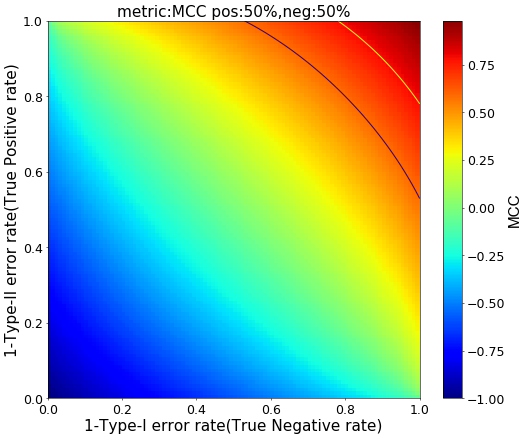

In [4]:
plt=DrawContour(MCC,Nmetric="MCC",nPos=50,nNeg=50)
plt.savefig('MCC_50_50.jpg')
plt.savefig('MCC_50_50.eps')
plt.show()

C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


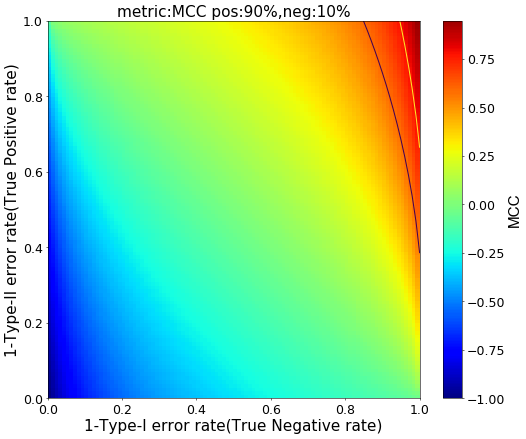

In [5]:
plt=DrawContour(MCC,Nmetric="MCC",nPos=90,nNeg=10)
plt.savefig('MCC_90_10.jpg')
plt.savefig('MCC_90_10.eps')
plt.show()

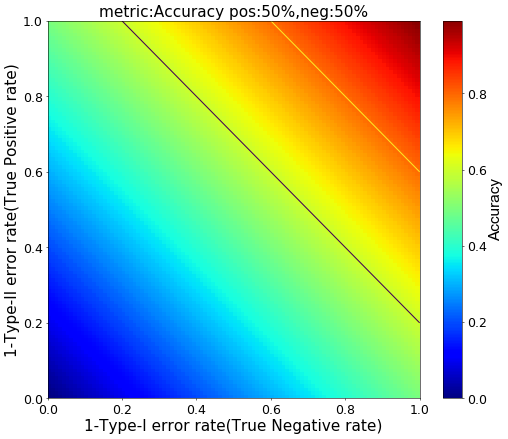

In [6]:
plt=DrawContour(Accuracy,Nmetric="Accuracy",nPos=50,nNeg=50)
plt.savefig('Accuracy_50_50.jpg')
plt.savefig('Accuracy_50_50.eps')
plt.show()

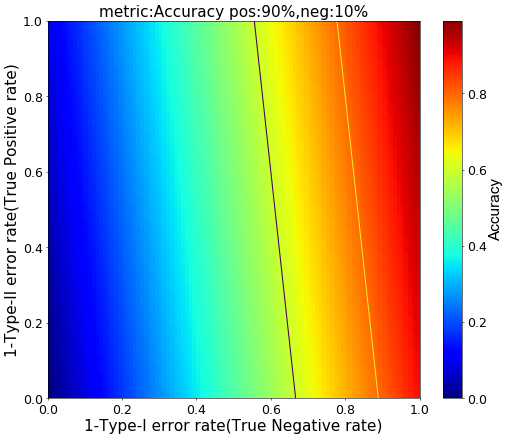

In [7]:
plt=DrawContour(Accuracy,Nmetric="Accuracy",nPos=90,nNeg=10)
plt.savefig('Accuracy_90_10.jpg')
plt.savefig('Accuracy_90_10.eps')
plt.show()

C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


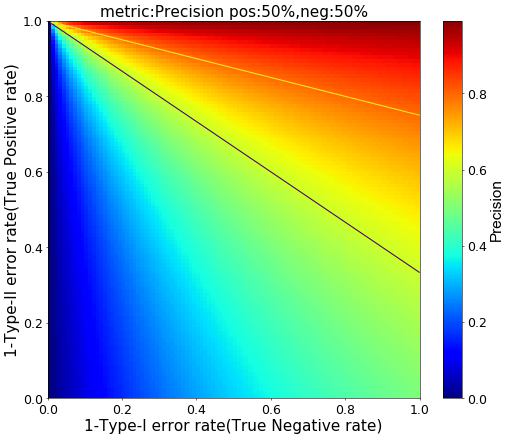

In [8]:
plt=DrawContour(Precision,Nmetric="Precision",nPos=50,nNeg=50)
plt.savefig('Precision_50_50.jpg')
plt.savefig('Precision_50_50.eps')
plt.show()

C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


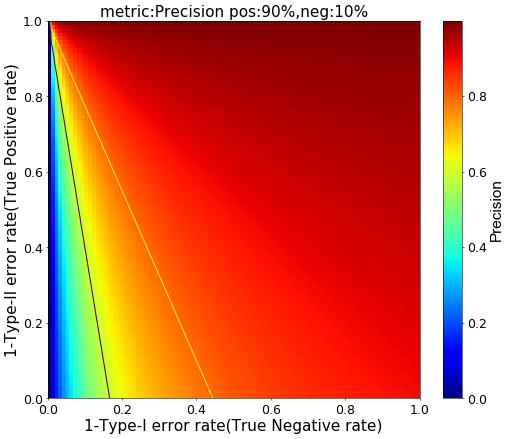

In [9]:
plt=DrawContour(Precision,Nmetric="Precision",nPos=90,nNeg=10)
plt.savefig('Precision_90_10.jpg')
plt.savefig('Precision_90_10.eps')
plt.show()

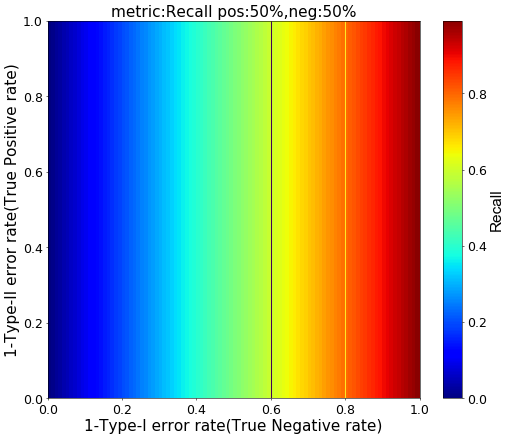

In [10]:
plt=DrawContour(Recall,Nmetric="Recall",nPos=50,nNeg=50)
plt.savefig('Recall_50_50.jpg')
plt.savefig('Recall_50_50.eps')
plt.show()

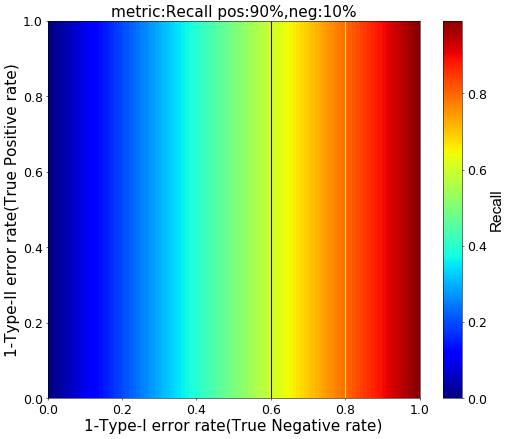

In [11]:
plt=DrawContour(Recall,Nmetric="Recall",nPos=90,nNeg=10)
plt.savefig('Recall_90_10.jpg')
plt.savefig('Recall_90_10.eps')
plt.show()

C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


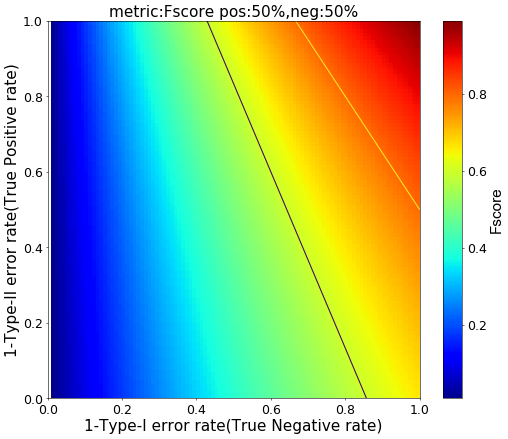

In [12]:
plt=DrawContour(Fscore,Nmetric="Fscore",nPos=50,nNeg=50)
plt.savefig('Fscore_50_50.jpg')
plt.savefig('Fscore_50_50.eps')
plt.show()

C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\sakai\Anaconda3\envs\tensorflow17\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


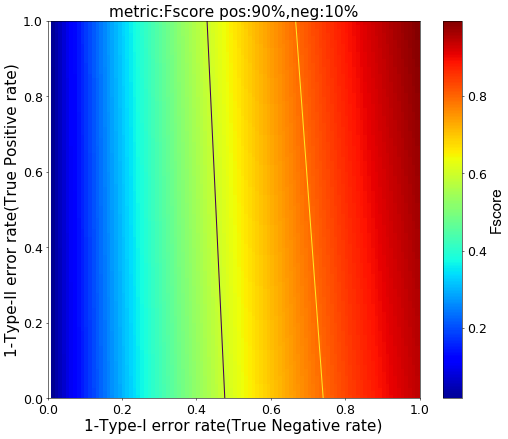

In [13]:
plt=DrawContour(Fscore,Nmetric="Fscore",nPos=90,nNeg=10)
plt.savefig('Fscore_90_10.jpg')
plt.savefig('Fscore_90_10.eps')
plt.show()

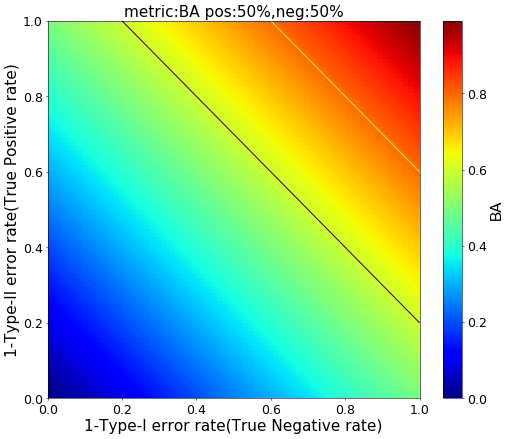

In [14]:
plt=DrawContour(BA,Nmetric="BA",nPos=50,nNeg=50)
plt.savefig('BA_50_50.jpg')
plt.savefig('BA_50_50.eps')
plt.show()

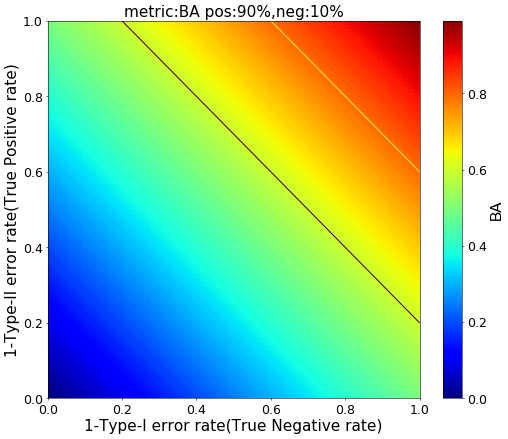

In [15]:
plt=DrawContour(BA,Nmetric="BA",nPos=90,nNeg=10)
plt.savefig('BA_90_10.jpg')
plt.savefig('BA_90_10.eps')
plt.show()

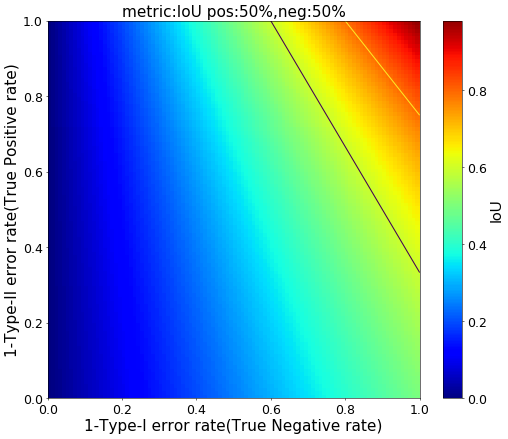

In [16]:
plt=DrawContour(IoU,Nmetric="IoU",nPos=50,nNeg=50)
plt.savefig('IoU_50_50.jpg')
plt.savefig('IoU_50_50.eps')
plt.show()

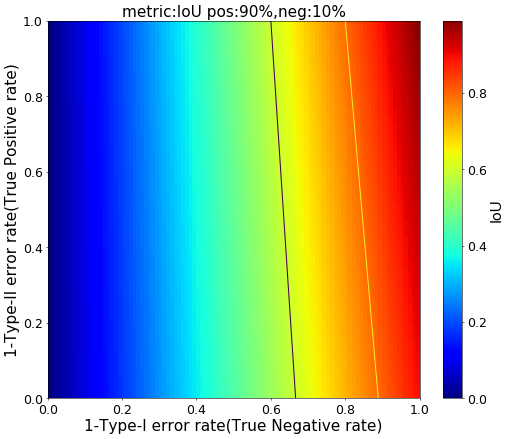

In [17]:
plt=DrawContour(IoU,Nmetric="IoU",nPos=90,nNeg=10)
plt.savefig('IoU_90_10.jpg')
plt.savefig('IoU_90_10.eps')
plt.show()